In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 中央区、港区、千代田区のCSVファイルを読み込む
chuo_data = pd.read_csv("/Users/nishizawarharuto/DSprogFinalProject/chuo_properties_no_built_year.csv")
minato_data = pd.read_csv("/Users/nishizawarharuto/DSprogFinalProject/minato_properties_no_built_year.csv")
chiyoda_data = pd.read_csv("/Users/nishizawarharuto/DSprogFinalProject/chiyoda_properties_no_built_year.csv")

# 全てのデータを統合
all_data = pd.concat([chuo_data, minato_data, chiyoda_data], ignore_index=True)

# データの確認
print("[INFO] データフレームの基本情報")
print(all_data.info())
print(all_data.head())

[INFO] データフレームの基本情報
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9848 entries, 0 to 9847
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   物件名     9848 non-null   object
 1   販売価格    9848 non-null   object
 2   所在地     9848 non-null   object
 3   専有面積    9848 non-null   object
 4   間取り     9848 non-null   object
dtypes: object(5)
memory usage: 384.8+ KB
None
            物件名    販売価格               所在地                 専有面積       間取り
0       アペニンハイム  3380万円   東京都中央区勝どき３-4-18  35.91m2（10.86坪）（登記）      1LDK
1     浜町グランドハイツ  3990万円       東京都中央区日本橋中洲             36m2（壁芯）  1K+S（納戸）
2     浜町グランドハイツ  4180万円       東京都中央区日本橋中洲     36m2（10.88坪）（壁芯）  1K+S（納戸）
3  ワコー東日本橋マンション  4250万円      東京都中央区日本橋浜町１  42.74m2（12.92坪）（壁芯）      1LDK
4    箱崎ダイヤマンション  4480万円  東京都中央区日本橋箱崎町13-8  43.82m2（13.25坪）（壁芯）      1LDK


In [5]:
# 価格を数値に変換（万円単位に統一）
def convert_price(price):
    try:
        # "億"と"万円"を同時に含む場合
        if "億" in price and "万円" in price:
            parts = price.split("億")
            oku = float(parts[0]) * 10000  # 億を万円に変換
            man = float(parts[1].replace("万円", "").strip())  # 万円を数値化
            return oku + man
        # "億円"のみの場合
        elif "億" in price:
            return float(price.replace("億円", "").strip()) * 10000
        # "万円"のみの場合
        elif "万円" in price:
            return float(price.replace("万円", "").strip())
        else:
            return None  # 不正なデータの場合
    except Exception as e:
        print(f"[WARNING] 価格の変換に失敗しました: {price}, エラー: {e}")
        return None

# 販売価格列を変換
all_data['販売価格'] = all_data['販売価格'].apply(convert_price)

# 面積を数値に変換（m²部分を削除）
all_data['専有面積'] = all_data['専有面積'].str.extract(r'(\d+\.\d+)').astype(float)

# データの確認
print(all_data.head())

            物件名    販売価格               所在地   専有面積       間取り
0       アペニンハイム  3380.0   東京都中央区勝どき３-4-18  35.91      1LDK
1     浜町グランドハイツ  3990.0       東京都中央区日本橋中洲    NaN  1K+S（納戸）
2     浜町グランドハイツ  4180.0       東京都中央区日本橋中洲  10.88  1K+S（納戸）
3  ワコー東日本橋マンション  4250.0      東京都中央区日本橋浜町１  42.74      1LDK
4    箱崎ダイヤマンション  4480.0  東京都中央区日本橋箱崎町13-8  43.82      1LDK


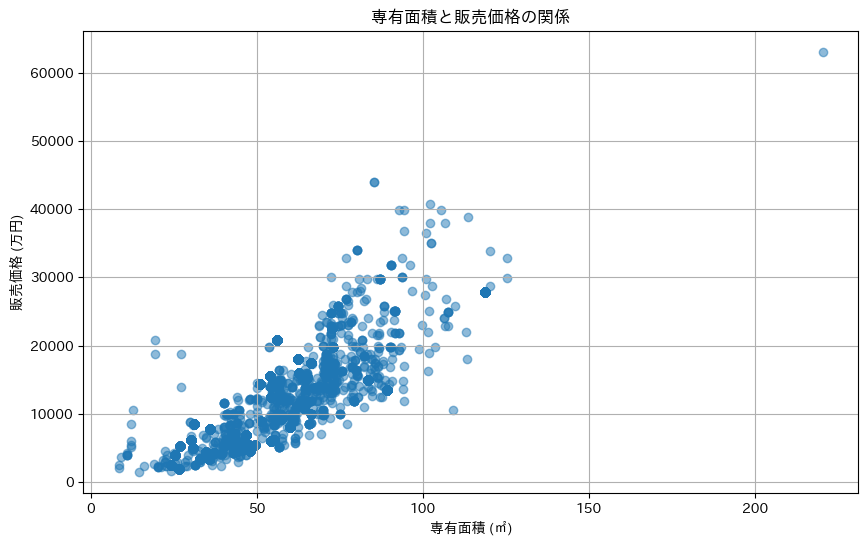

In [19]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントを簡単に設定

# グラフを再描画
plt.figure(figsize=(10, 6))
plt.scatter(all_data['専有面積'], all_data['販売価格'], alpha=0.5)
plt.title('専有面積と販売価格の関係')
plt.xlabel('専有面積 (㎡)')
plt.ylabel('販売価格 (万円)')
plt.grid(True)
plt.show()


/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/3982075741.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_price_avg = all_data.groupby('面積区分')['販売価格'].mean()


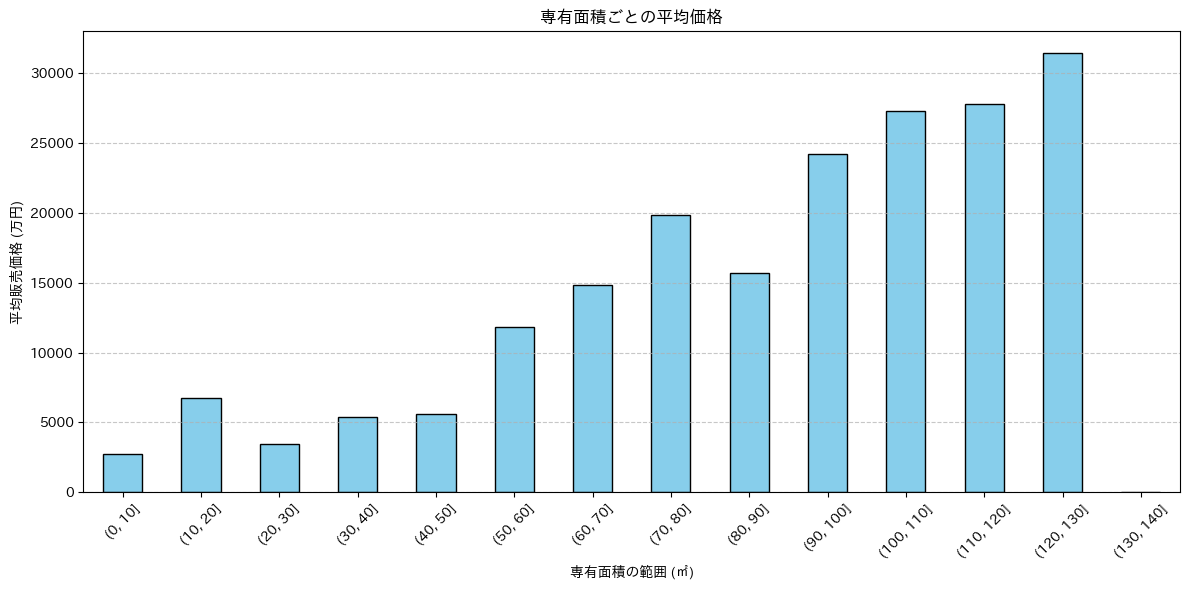

In [20]:
# 専有面積の範囲を指定してグループ化し、平均価格を計算
bins = range(0, 150, 10)  # 0㎡から150㎡まで10㎡ごとに区切る
all_data['面積区分'] = pd.cut(all_data['専有面積'], bins)

# 各範囲の平均販売価格を計算
area_price_avg = all_data.groupby('面積区分')['販売価格'].mean()

# ヒストグラムをプロット
plt.figure(figsize=(12, 6))
area_price_avg.plot(kind='bar', color='skyblue', edgecolor='black')

# グラフの設定
plt.title('専有面積ごとの平均価格')
plt.xlabel('専有面積の範囲 (㎡)')
plt.ylabel('平均販売価格 (万円)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# グラフ表示
plt.show()

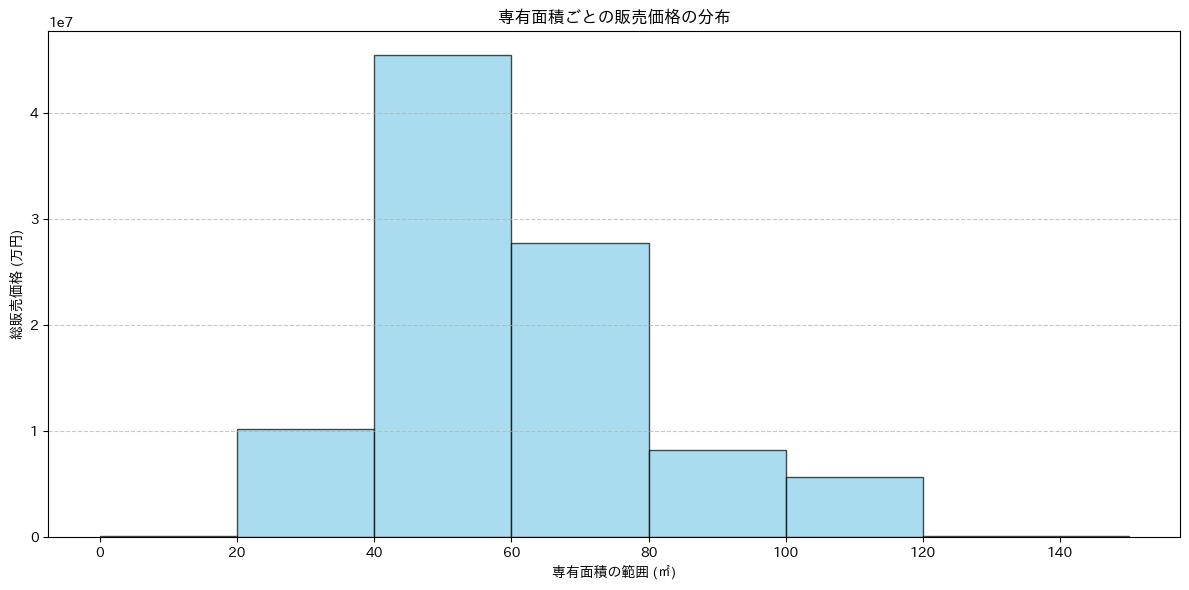

In [21]:
bins = [0, 20, 40, 60, 80, 100, 120, 150]  # 細かい範囲に分割
all_data['面積区分'] = pd.cut(all_data['専有面積'], bins)

# ヒストグラム作成
plt.figure(figsize=(12, 6))
plt.hist(all_data['専有面積'], bins=bins, weights=all_data['販売価格'], color='skyblue', edgecolor='black', alpha=0.7)

# グラフの設定
plt.title('専有面積ごとの販売価格の分布')
plt.xlabel('専有面積の範囲 (㎡)')
plt.ylabel('総販売価格 (万円)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [23]:
correlation = all_data['販売価格'].corr(all_data['専有面積'])
print(f"販売価格と専有面積の相関係数: {correlation:.2f}")

販売価格と専有面積の相関係数: 0.81


/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/1811037259.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



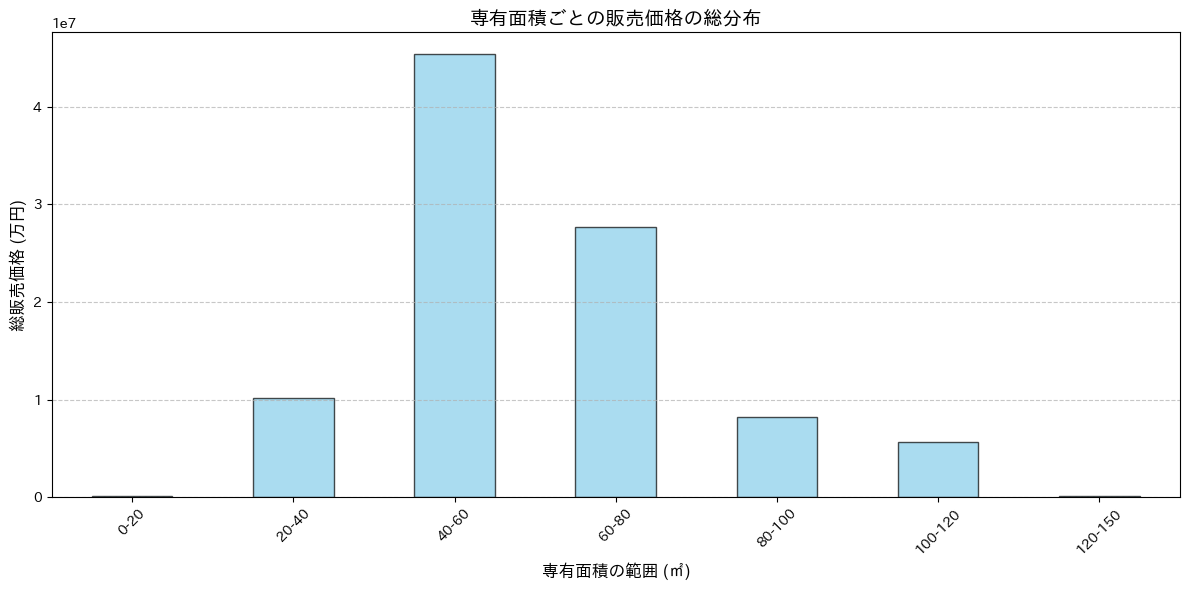

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# 範囲（bins）を指定
bins = [0, 20, 40, 60, 80, 100, 120, 150]  # 細かい範囲に分割
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-150']  # 範囲ラベル

# 範囲を「面積区分」として新しい列に追加
all_data['面積区分'] = pd.cut(all_data['専有面積'], bins=bins, labels=labels)

# ヒストグラムを作成
plt.figure(figsize=(12, 6))
all_data.groupby('面積区分')['販売価格'].sum().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# グラフの設定
plt.title('専有面積ごとの販売価格の総分布', fontsize=14)
plt.xlabel('専有面積の範囲 (㎡)', fontsize=12)
plt.ylabel('総販売価格 (万円)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# レイアウトを調整して表示
plt.tight_layout()
plt.show()

In [27]:
# データを区ごとに分割
chiyoda_data = all_data[all_data['所在地'].str.contains('千代田区')]
chuou_data = all_data[all_data['所在地'].str.contains('中央区')]
minato_data = all_data[all_data['所在地'].str.contains('港区')]

# 各区のデータの確認
print(f"千代田区の物件数: {len(chiyoda_data)}")
print(f"中央区の物件数: {len(chuou_data)}")
print(f"港区の物件数: {len(minato_data)}")

千代田区の物件数: 5220
中央区の物件数: 1088
港区の物件数: 3540


In [28]:
# 各区の平均価格を計算
mean_prices = {
    '千代田区': chiyoda_data['販売価格'].mean(),
    '中央区': chuou_data['販売価格'].mean(),
    '港区': minato_data['販売価格'].mean()
}

# 平均価格を表示
for district, mean_price in mean_prices.items():
    print(f"{district}の平均販売価格: {mean_price:.2f} 万円")


千代田区の平均販売価格: 12559.47 万円
中央区の平均販売価格: 13995.27 万円
港区の平均販売価格: 4736.57 万円


<Figure size 1000x600 with 0 Axes>

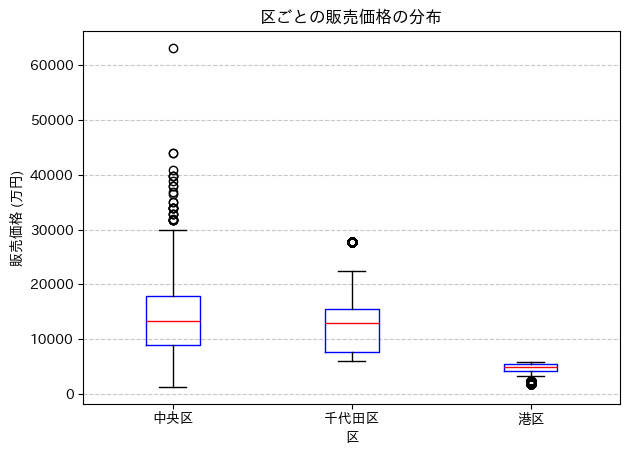

In [32]:
plt.figure(figsize=(10, 6))
all_data.boxplot(column='販売価格', by='区', grid=False, color=dict(boxes='blue', whiskers='black', medians='red'))

# グラフの設定
plt.title('区ごとの販売価格の分布')
plt.suptitle('')
plt.xlabel('区')
plt.ylabel('販売価格 (万円)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


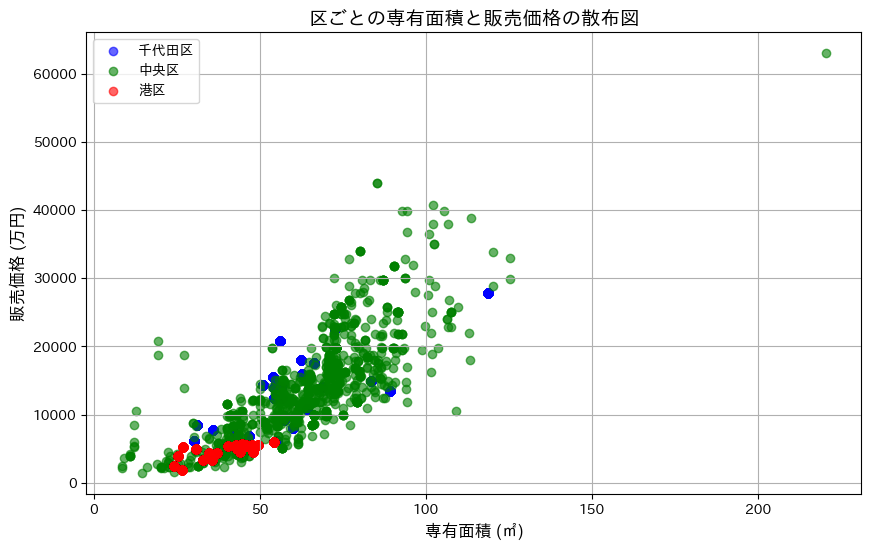

In [29]:
import matplotlib.pyplot as plt

# グラフの作成
plt.figure(figsize=(10, 6))

# 各区のデータをプロット
plt.scatter(chiyoda_data['専有面積'], chiyoda_data['販売価格'], alpha=0.6, label='千代田区', color='blue')
plt.scatter(chuou_data['専有面積'], chuou_data['販売価格'], alpha=0.6, label='中央区', color='green')
plt.scatter(minato_data['専有面積'], minato_data['販売価格'], alpha=0.6, label='港区', color='red')

# グラフの設定
plt.title('区ごとの専有面積と販売価格の散布図', fontsize=14)
plt.xlabel('専有面積 (㎡)', fontsize=12)
plt.ylabel('販売価格 (万円)', fontsize=12)
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()


/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/2300173246.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/2300173246.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



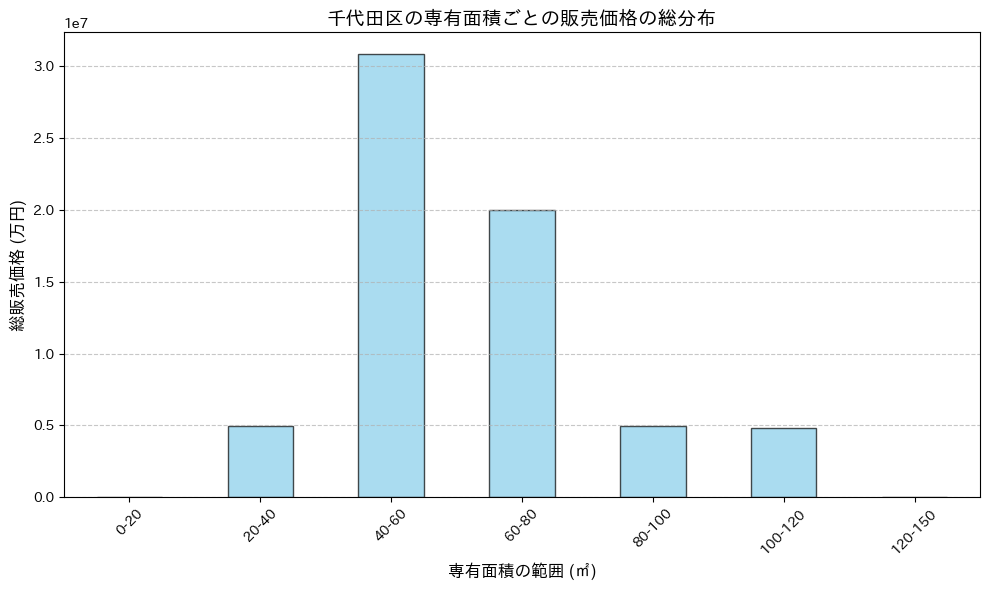

/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/2300173246.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/2300173246.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



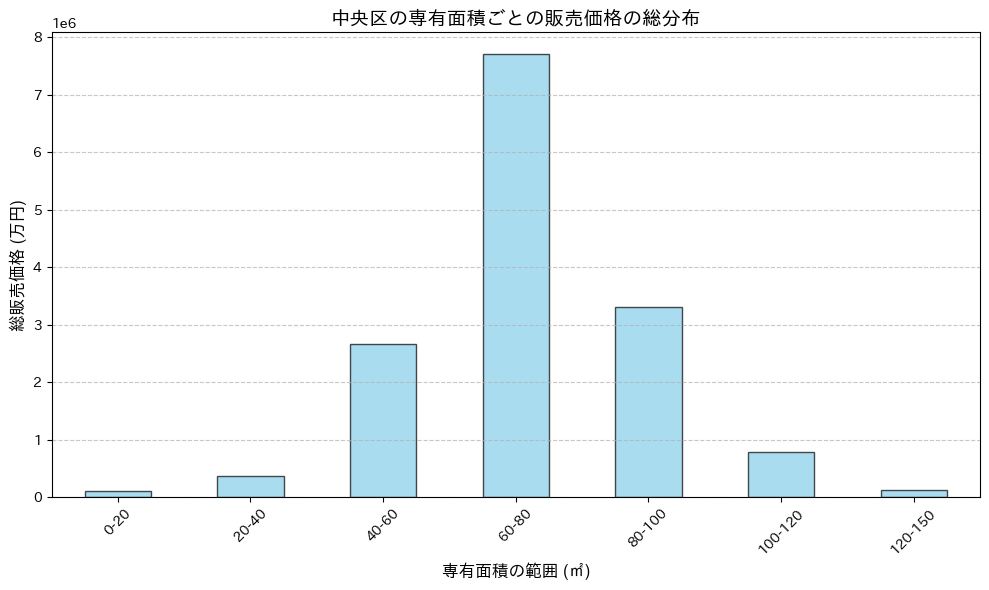

/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/2300173246.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/2300173246.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



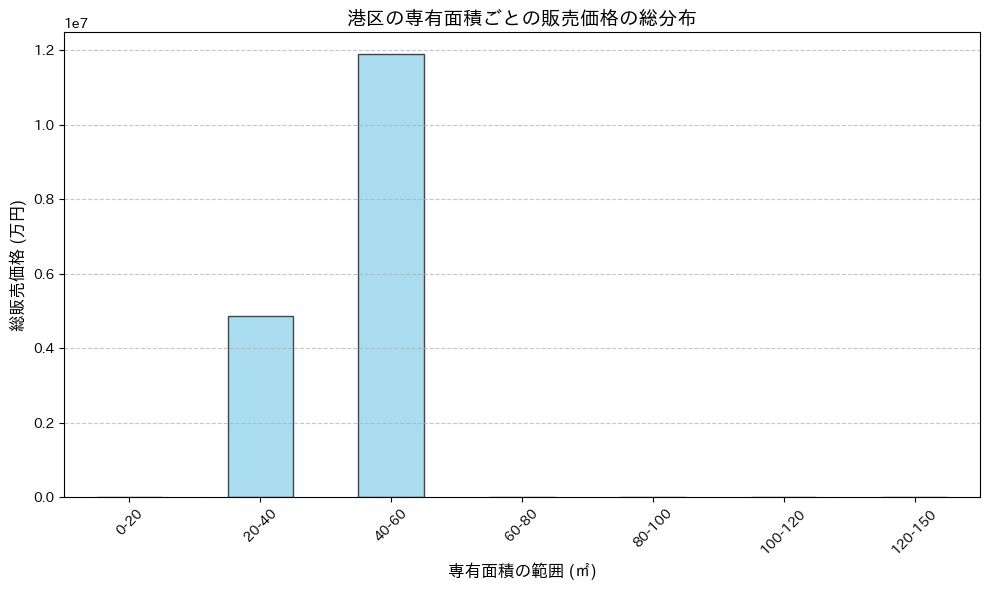

In [30]:
# 範囲（bins）を指定
bins = [0, 20, 40, 60, 80, 100, 120, 150]  # 細かい範囲に分割
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-150']  # 範囲ラベル

# 各区の範囲ごとの販売価格を集計
for district, data in zip(['千代田区', '中央区', '港区'], [chiyoda_data, chuou_data, minato_data]):
    data['面積区分'] = pd.cut(data['専有面積'], bins=bins, labels=labels)
    price_by_area = data.groupby('面積区分')['販売価格'].sum()
    
    # ヒストグラムをプロット
    plt.figure(figsize=(10, 6))
    price_by_area.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
    
    # グラフの設定
    plt.title(f'{district}の専有面積ごとの販売価格の総分布', fontsize=14)
    plt.xlabel('専有面積の範囲 (㎡)', fontsize=12)
    plt.ylabel('総販売価格 (万円)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # グラフを表示
    plt.tight_layout()
    plt.show()


/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/929175522.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/929175522.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/7p/s_rnmf_n6x5drkvgkyt7blnh0000gn/T/ipykernel_86990/929175522.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

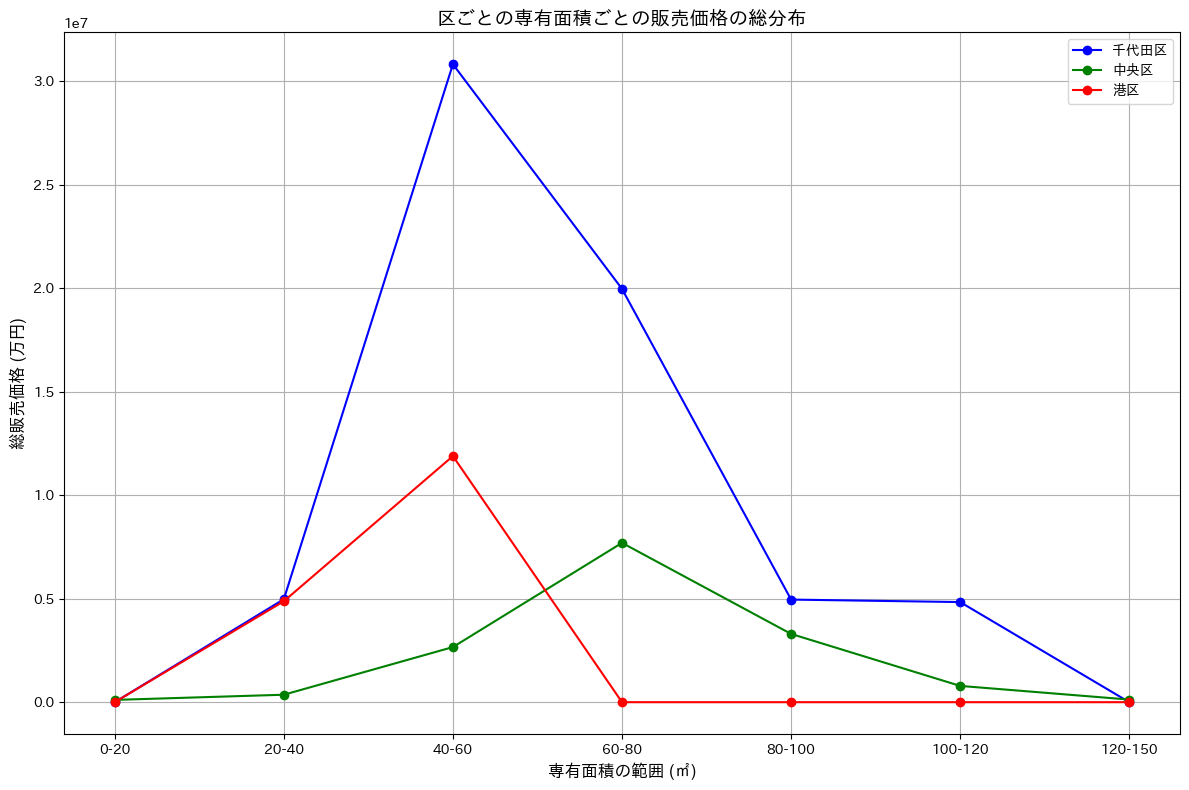

In [31]:
# 範囲（bins）を指定
bins = [0, 20, 40, 60, 80, 100, 120, 150]  # 細かい範囲に分割
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-150']  # 範囲ラベル

# 各区の範囲ごとの販売価格を計算
districts_data = {'千代田区': chiyoda_data, '中央区': chuou_data, '港区': minato_data}
price_by_area_dict = {}

for district, data in districts_data.items():
    data['面積区分'] = pd.cut(data['専有面積'], bins=bins, labels=labels)
    price_by_area_dict[district] = data.groupby('面積区分')['販売価格'].sum()

# グラフを作成
plt.figure(figsize=(12, 8))

# 各区のデータをプロット
colors = {'千代田区': 'blue', '中央区': 'green', '港区': 'red'}
for district, price_by_area in price_by_area_dict.items():
    plt.plot(labels, price_by_area, marker='o', label=district, color=colors[district])

# グラフの設定
plt.title('区ごとの専有面積ごとの販売価格の総分布', fontsize=14)
plt.xlabel('専有面積の範囲 (㎡)', fontsize=12)
plt.ylabel('総販売価格 (万円)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# グラフを表示
plt.show()
